# Monthly Production Forecasting 


### 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [559]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [560]:
import sklearn
from sklearn.metrics import mean_squared_error

### 2. Read and understand the data

In [561]:
data = pd.read_csv('/Users/admin/Desktop/EDA/Time_series/monthly-production.csv')
data.head()

Month  Monthly Production
0  1956-01                93.2
1  1956-02                96.0
2  1956-03                95.2
3  1956-04                77.1
4  1956-05                70.9

In [562]:
# Check the shape of the data
data.shape

(476, 2)

In [563]:
# Check the overall info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               476 non-null    object 
 1   Monthly Production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [564]:
# Check the numerical data stats
data.describe()

Monthly Production
count          476.000000
mean           136.395378
std             33.738725
min             64.800000
25%            112.900000
50%            139.150000
75%            158.825000
max            217.800000

### 3. Exploratory Data Analysis

**3.1 Missing values**

In [565]:
data.isnull().sum()

Month                 0
Monthly Production    0
dtype: int64

**Inference: There are no missing values in the data.**

**3.2 Outliers**

In [566]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Monthly Production
count          476.000000
mean           136.395378
std             33.738725
min             64.800000
25%            112.900000
50%            139.150000
75%            158.825000
90%            181.950000
95%            192.000000
99%            209.000000
max            217.800000

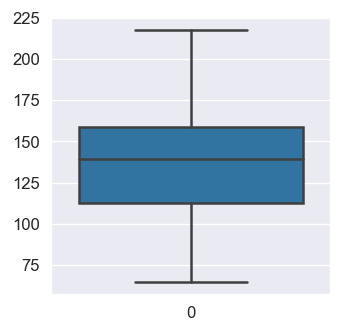

In [567]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Monthly Production'])
plt.show()

**Inference: We can clearly see that there are outliers in the data.**

In [568]:
#convert to year and month
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m')
df=data.copy()


In [569]:
df['year'] = df['Month'].dt.year 
df['month'] = df['Month'].dt.month 

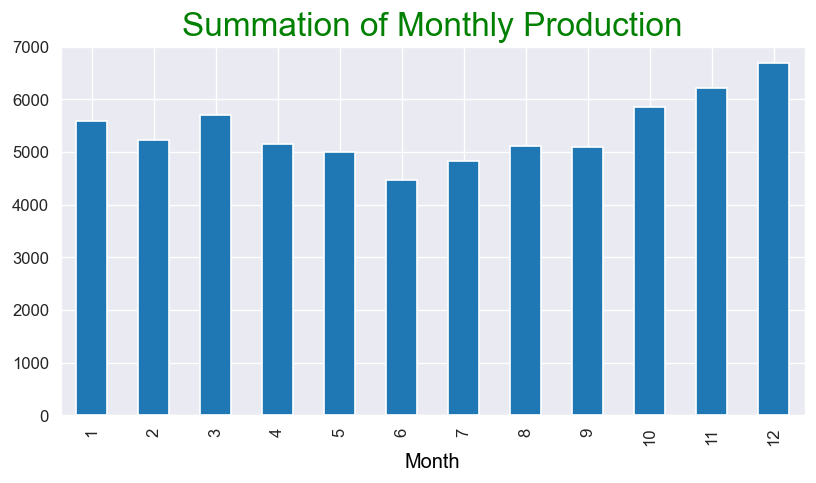

In [570]:
# Monthly Product
plt.figure(figsize= (8,4))
df.groupby("month")["Monthly Production"].sum().plot.bar()
plt.title("Summation of Monthly Production", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Month", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


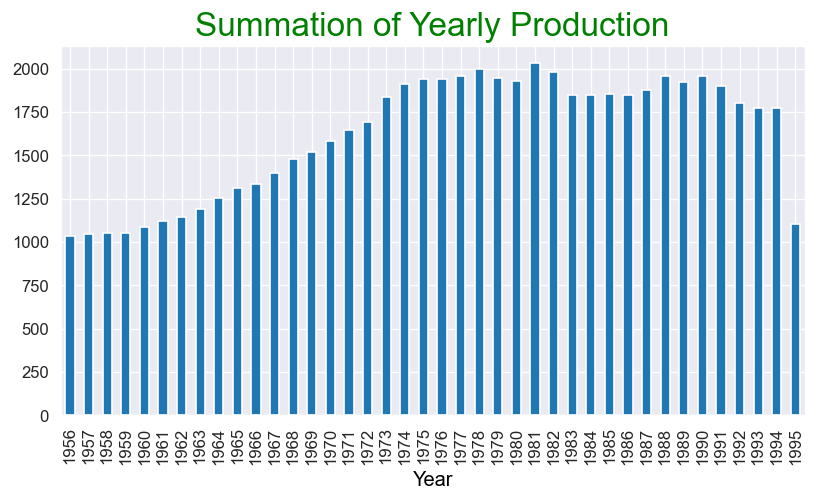

In [571]:
# Monthly Product
plt.figure(figsize= (8,4))
df.groupby("year")["Monthly Production"].sum().plot.bar()
plt.title("Summation of Yearly Production", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Year", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


### 5. Time series Decomposition

In [572]:
data.set_index(['Month'], inplace=True)


In [573]:
data1 = data.copy()

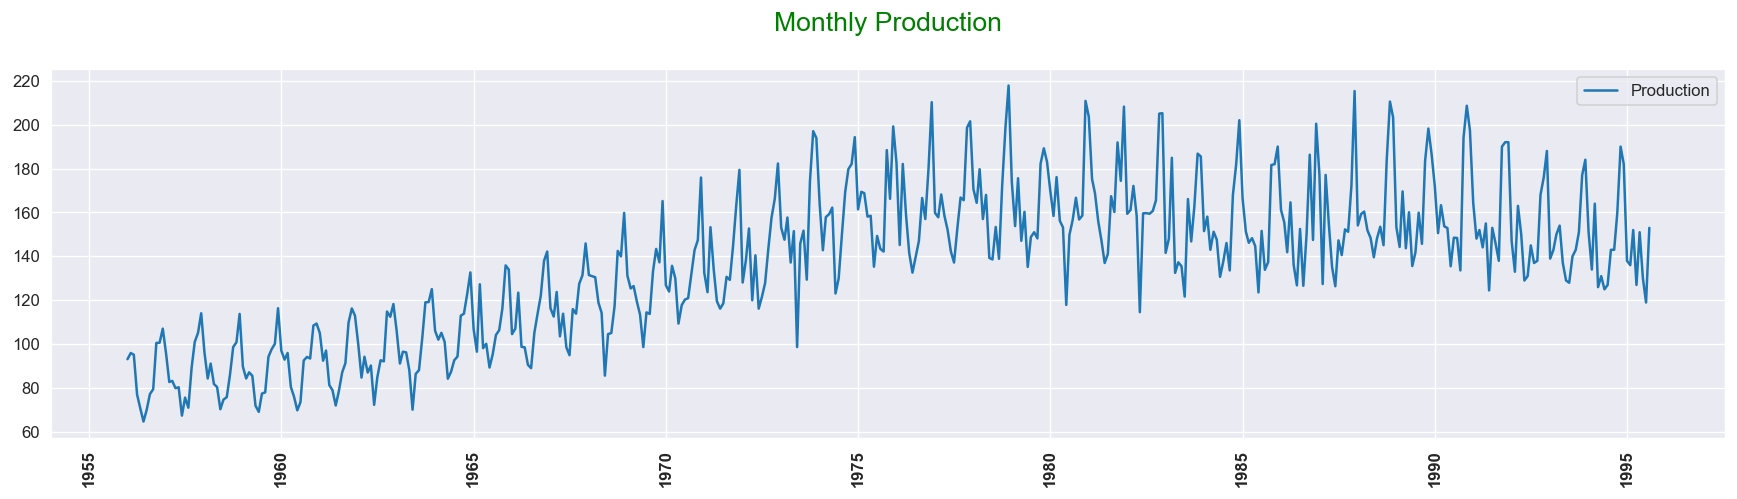

In [574]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Production')
plt.legend(loc='best')
plt.title('Monthly Production\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

**Additive seasonal decomposition**

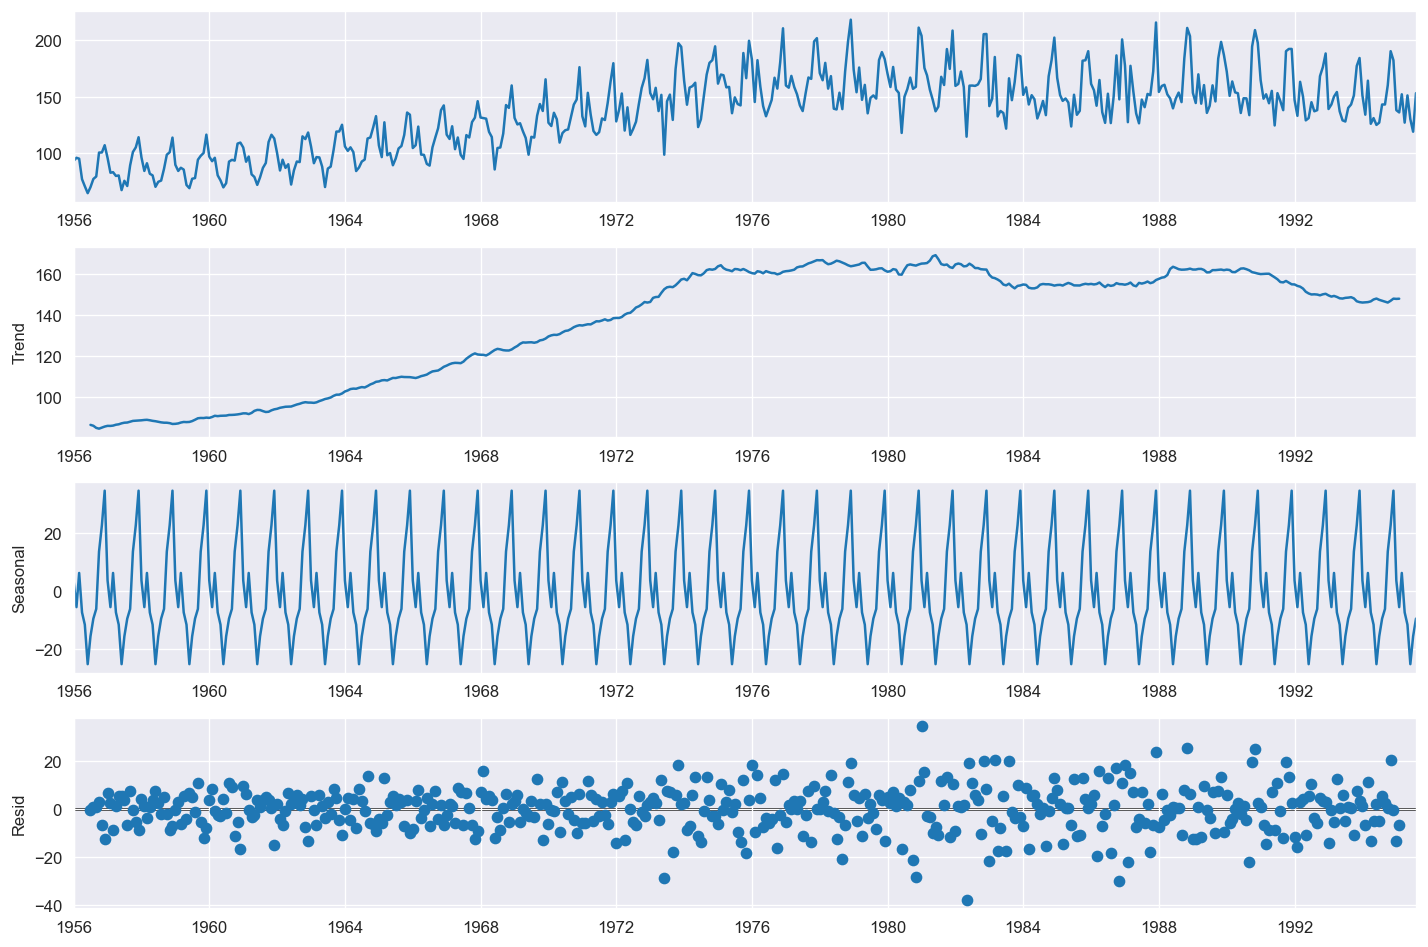

In [575]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

**Multiplicative seasonal decomposition**

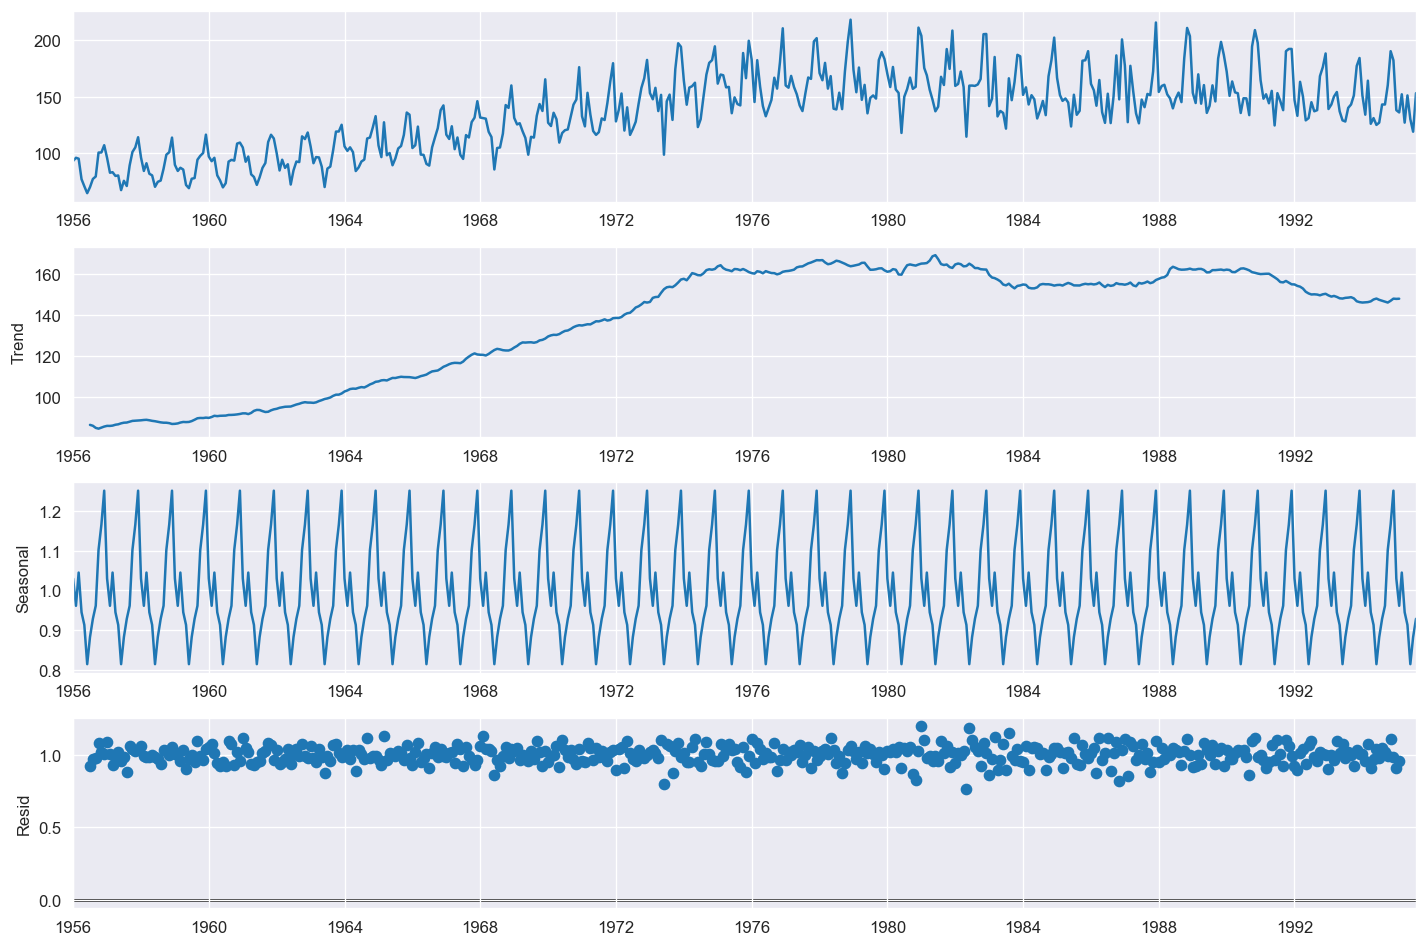

In [576]:
decomposition = sm.tsa.seasonal_decompose(data1, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

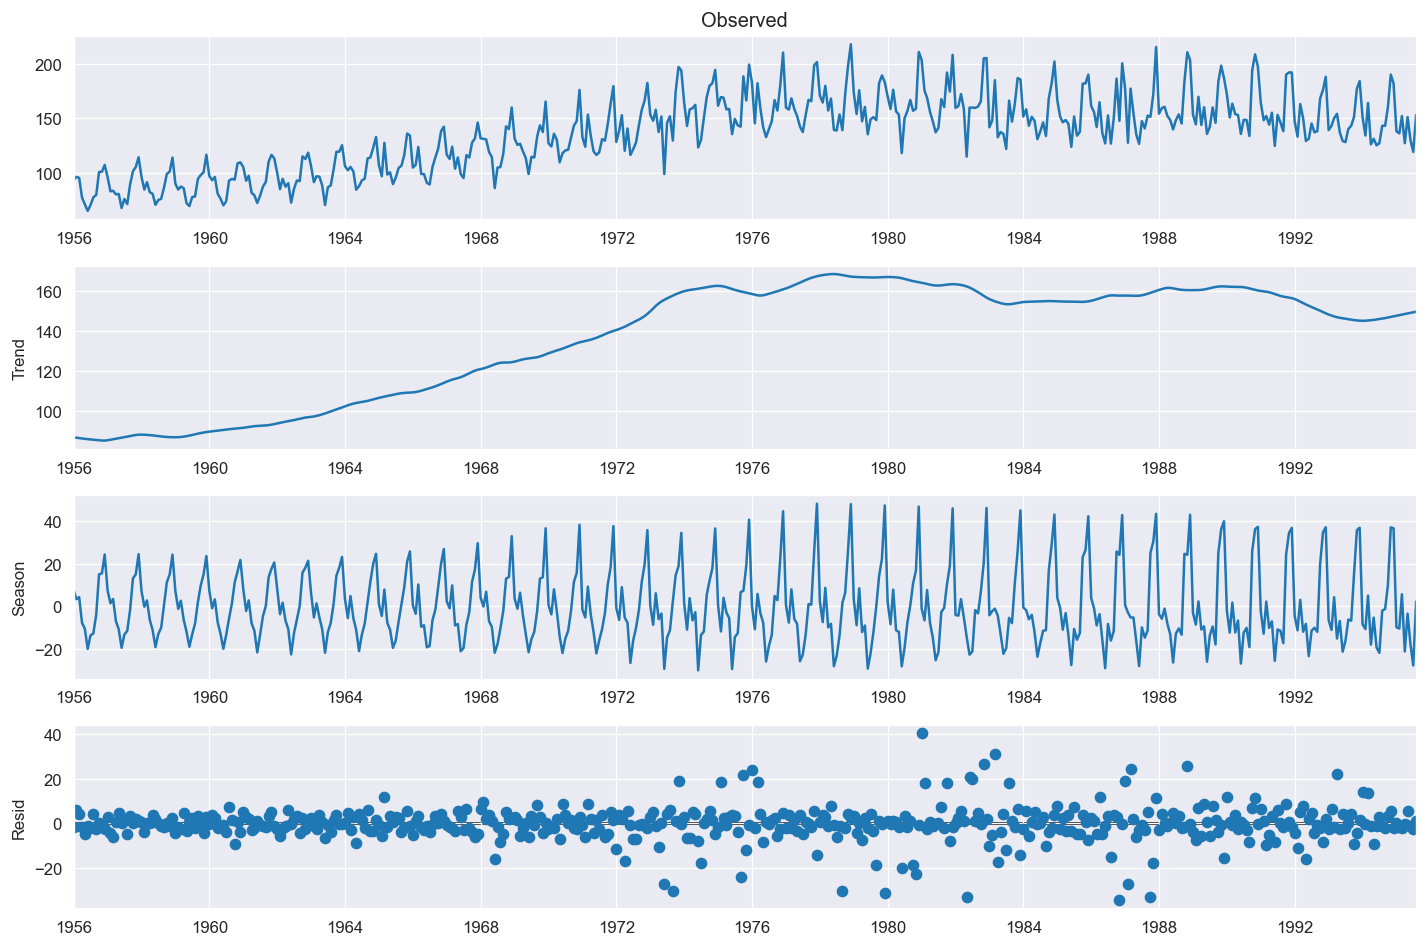

In [577]:

res = sm.tsa.STL(data1, robust = True).fit() 
res.plot()
plt.show()

**Inference : The data contains level, trend and seasonality (multiplicative).**

### 6. Build and Evaluate Time Series Forecast

There are 3 different ways in which we can frame a time series forecasting problem as a supervised learning problem:

Predict the next time step using the previous observation

Predict the next time step using a sequence of past observations

Predict a sequence of future time steps using a sequence of past observations 

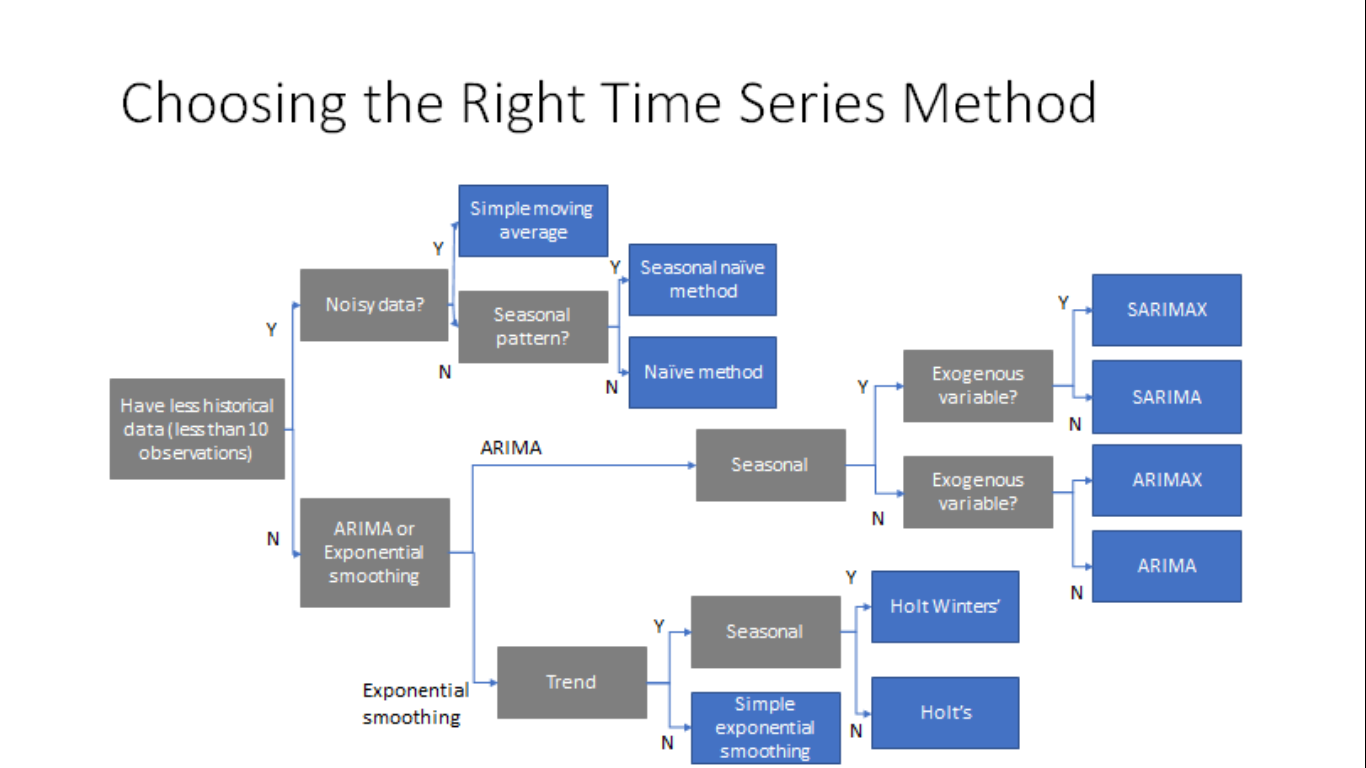

#### **The number of observations in the train set are more than 10 (476 observations in train set) and our data has both Trend and Seasonality. As per the above flowchart, Holt Winters' Exponential Smoothing (among the smoothing techniques) and SARIMA model (among the ARIMA set of techniques) will be the best for forecasting the Sales for test data.**<br><br>


**Split the data into train and test sets.**

In [578]:
prod = data1.copy()

In [579]:
train = prod[:'1989-12-01']
test = prod['1990-01-01':]

## Simple time series methods

Modeling time series with
There are 3 different ways in which we can frame a time series forecasting problem as a supervised learning problem:

Predict the next time step using the previous observation

Predict the next time step using a sequence of past observations

Predict a sequence of future time steps using a sequence of past observations Let’s explore each situation in details!

### Naive method

In [580]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Monthly Production']['1989-12-01']


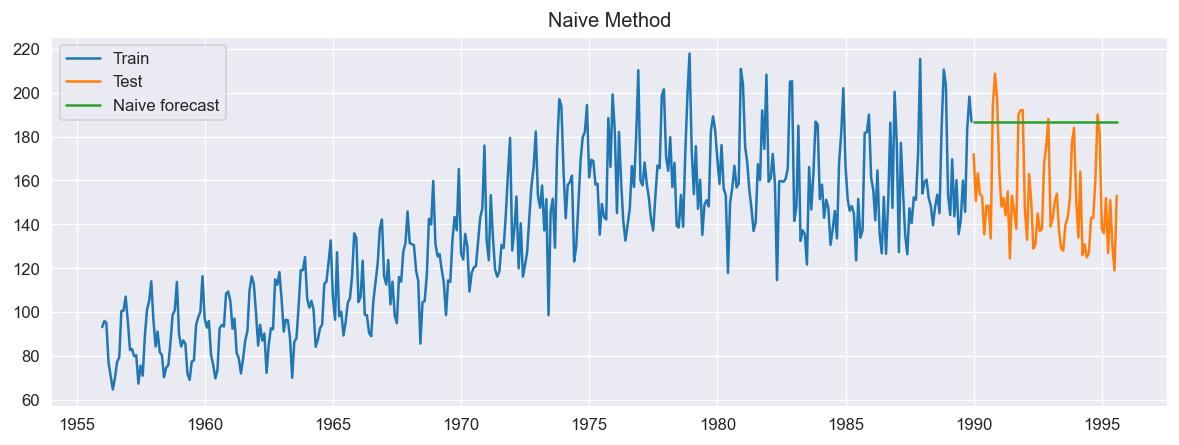

In [581]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [582]:
# Calculate RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_naive['naive_forecast'])/test['Monthly Production'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method   RMSE   MAPE
0  Naive method  40.81  26.12

### Simple average method

In [583]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Monthly Production'].mean()

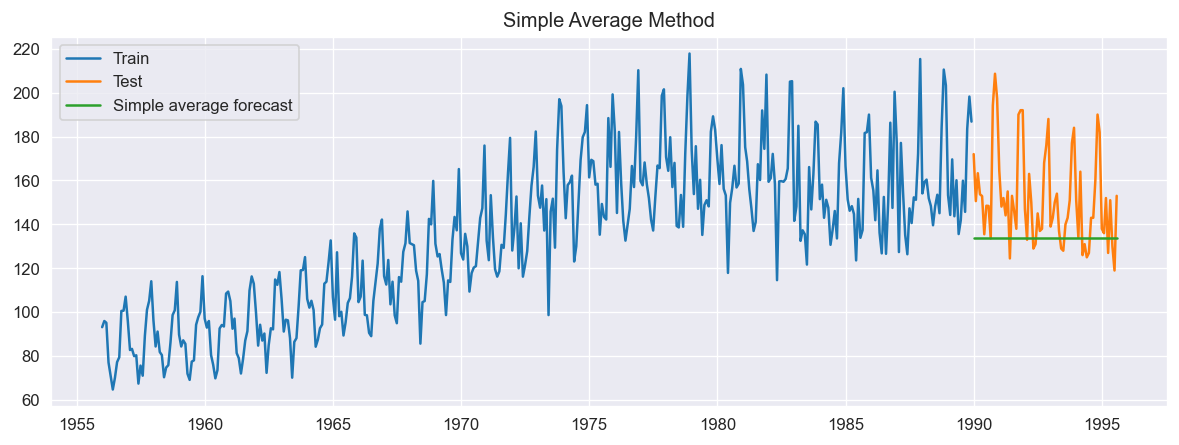

In [584]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [585]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_avg['avg_forecast'])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method   RMSE   MAPE
0           Naive method  40.81  26.12
0  Simple average method  27.55  12.14

### Simple moving average method

In [586]:
y_hat_sma = data1.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data1['Monthly Production'].rolling(ma_window).mean()
y_hat_sma['sma_forecast']['1990-01-01':] = y_hat_sma['sma_forecast']['1989-12-01']


In [587]:
y_hat_sma['sma_forecast']

Month
1956-01-01           NaN
1956-02-01           NaN
1956-03-01           NaN
1956-04-01           NaN
1956-05-01           NaN
                 ...    
1995-04-01    160.208333
1995-05-01    160.208333
1995-06-01    160.208333
1995-07-01    160.208333
1995-08-01    160.208333
Name: sma_forecast, Length: 476, dtype: float64

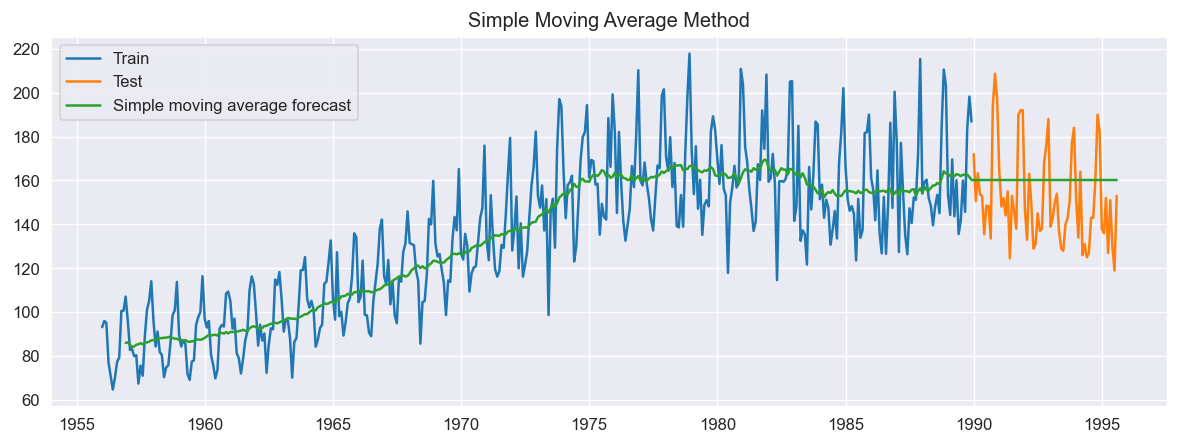

In [588]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [589]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_sma['sma_forecast']['1990-01-01':])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_sma['sma_forecast']['1990-01-01':])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method   RMSE   MAPE
0                    Naive method  40.81  26.12
0           Simple average method  27.55  12.14
0  Simple moving average forecast  22.57  13.38

## Exponential Smoothing Techniques

### Simple exponential smoothing

In [590]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Monthly Production'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

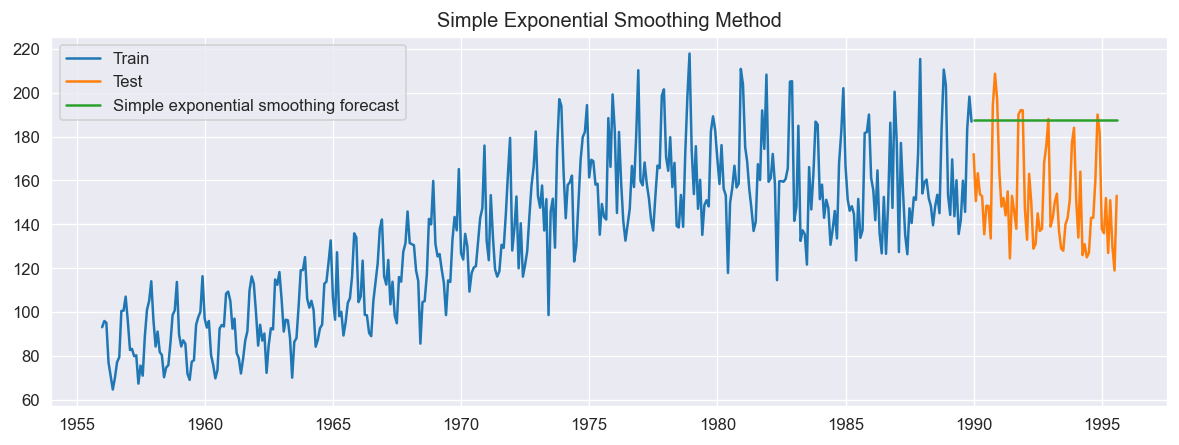

In [591]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [592]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_ses['ses_forecast'])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

Method   RMSE   MAPE
0                           Naive method  40.81  26.12
0                  Simple average method  27.55  12.14
0         Simple moving average forecast  22.57  13.38
0  Simple exponential smoothing forecast  41.59  26.62

### Holt's method with trend

In [593]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Monthly Production']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.6685533045475974, 'smoothing_trend': 0.0005255582635381974, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 92.47068804971151, 'initial_trend': 0.22816472301196453, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


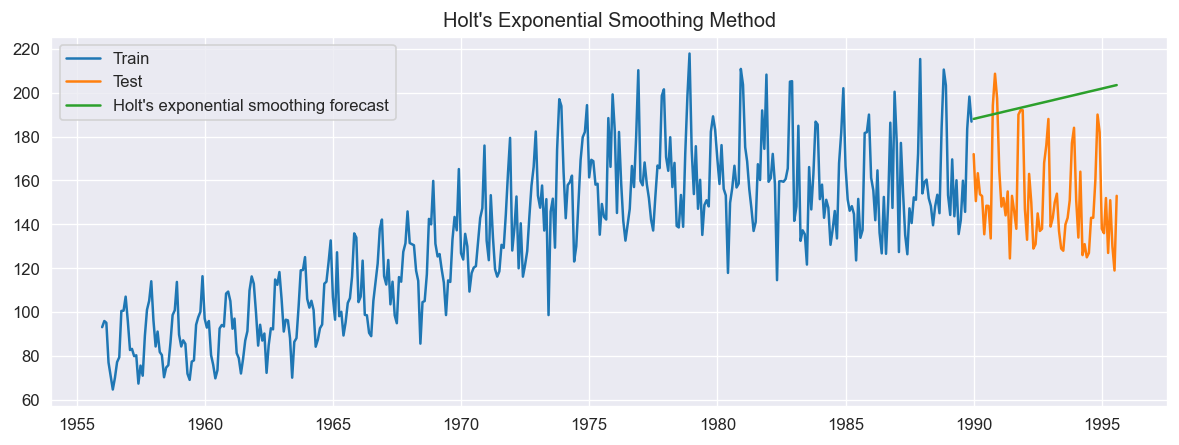

In [594]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [595]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_holt['holt_forecast'])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method   RMSE   MAPE
0                           Naive method  40.81  26.12
0                  Simple average method  27.55  12.14
0         Simple moving average forecast  22.57  13.38
0  Simple exponential smoothing forecast  41.59  26.62
0    Holt's exponential smoothing method  49.41  31.79

**Inference : Holt's exponential smoothing method performs better than Simple exponential smoothing.**

### Holt Winters' additive method with trend and seasonality

In [596]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Monthly Production']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.07006106768899562, 'smoothing_trend': 0.06852678938933426, 'smoothing_seasonal': 0.0021768778989947088, 'damping_trend': nan, 'initial_level': 86.38909153544498, 'initial_trend': -0.013548395809052226, 'initial_seasons': array([  4.69118681,  -3.76973742,   6.62409337,  -7.1622335 ,
       -11.358141  , -24.89834305, -15.7524692 ,  -9.29304173,
        -4.98156035,  12.57104338,  20.55597499,  34.10170498]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


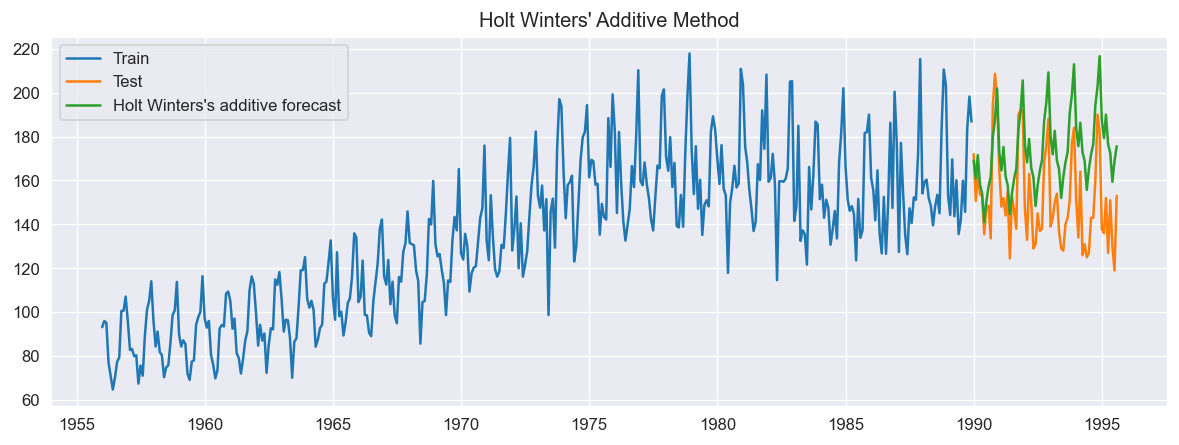

In [597]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [598]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_hwa['hw_forecast'])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method   RMSE   MAPE
0                           Naive method  40.81  26.12
0                  Simple average method  27.55  12.14
0         Simple moving average forecast  22.57  13.38
0  Simple exponential smoothing forecast  41.59  26.62
0    Holt's exponential smoothing method  49.41  31.79
0          Holt Winters' additive method  26.80  16.29

**Inference : Holt Winters' additive method performs better than Holt's method with trend.**

### Holt Winter's multiplicative method with trend and seasonality

In [599]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Monthly Production']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.07511136459985121, 'smoothing_trend': 0.06482414870644218, 'smoothing_seasonal': 2.012977678126798e-06, 'damping_trend': nan, 'initial_level': 55.18332829071432, 'initial_trend': 0.0685172112147557, 'initial_seasons': array([1.60047177, 1.50410332, 1.6284792 , 1.46946399, 1.42328564,
       1.26825806, 1.37181319, 1.44692703, 1.48510825, 1.68891817,
       1.7838386 , 1.94126522]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


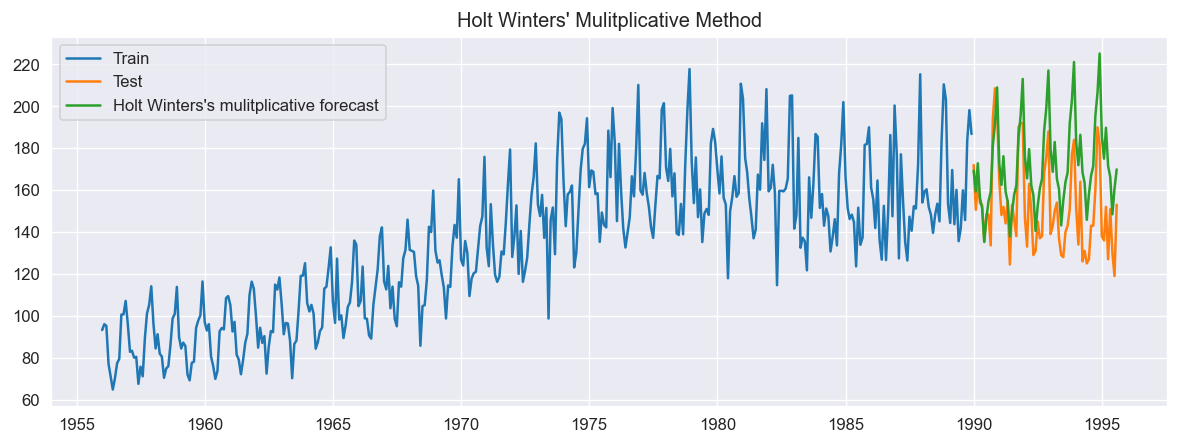

In [600]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [601]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_hwm['hw_forecast'])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method   RMSE   MAPE
0                           Naive method  40.81  26.12
0                  Simple average method  27.55  12.14
0         Simple moving average forecast  22.57  13.38
0  Simple exponential smoothing forecast  41.59  26.62
0    Holt's exponential smoothing method  49.41  31.79
0          Holt Winters' additive method  26.80  16.29
0    Holt Winters' multiplicative method  24.87  14.73

In [602]:
mape

14.73

**Inference : Holt Winters' multiplicative method performs better than Holt Winters' additive method.**

### We conclude that the Holt Winters' multiplicative method in the smoothing techniques is able to forecast the sales closer to the actual values.The RMSE and MAPE values for this method are lower as compared to other model methods. This method is very well able to capture the trend and seasonality in the data. 

## Auto Regressive methods

### Check whether the time series is stationary

### Augmented Dickey-Fuller (ADF) test

In [603]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Monthly Production'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -2.282661
Critical Values @ 0.05: -2.87
p-value: 0.177621


### To make the series stationary, we need to perform differencing.

In [604]:
sta = data1.copy()
sta['diff']=sta['Monthly Production']-sta['Monthly Production'].shift()

### Augmented Dickey-Fuller (ADF) test

**Now let us see whether our series has become stationary.**

In [605]:
adfuller(sta['diff'].dropna())

(-4.980663743064783,
 2.423411785996173e-05,
 18,
 456,
 {'1%': -3.4447721346720885,
  '5%': -2.8678991615065095,
  '10%': -2.570157193174823},
 3455.355385768022)

**Inference : p-value is less than 0.05. This means that the series is stationary.**

### Now let us proceed towards building various AR models to forecast the Sales.

### Auto regression method (AR)

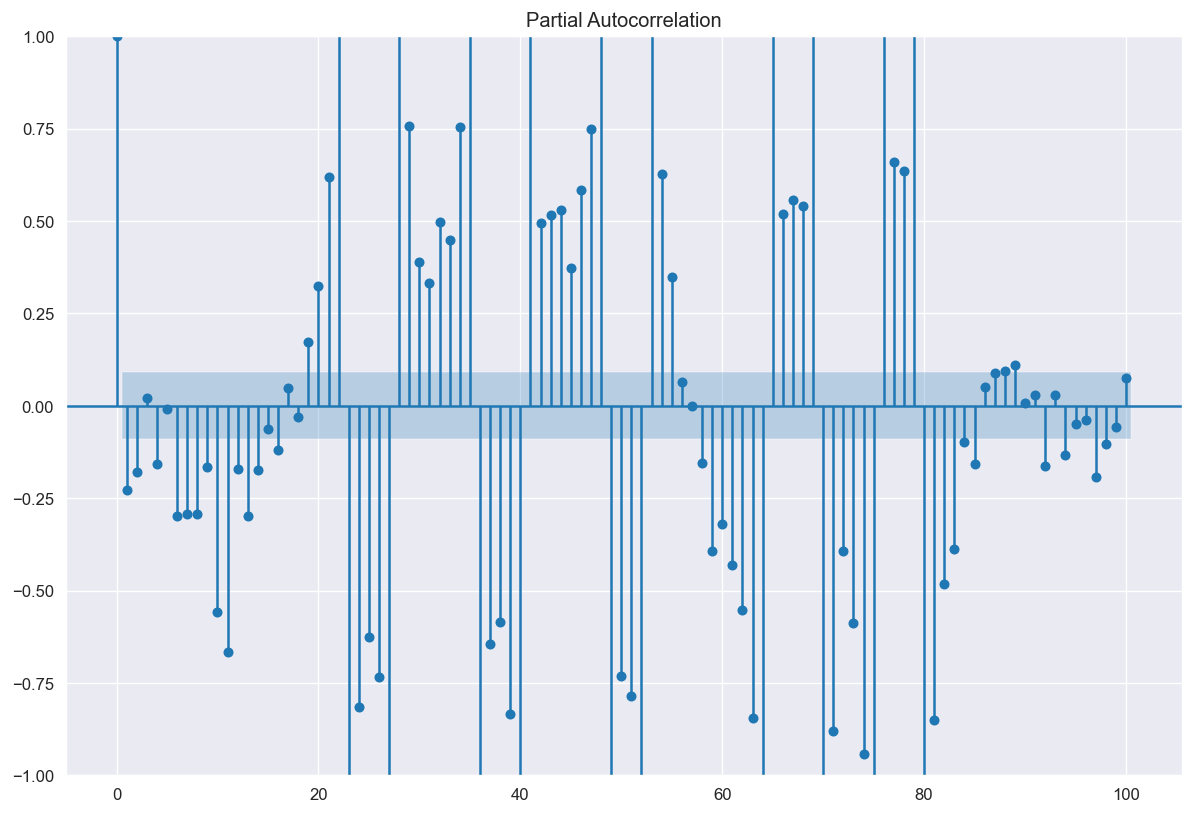

In [606]:
#Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data1['Monthly Production'].diff().dropna(), lags=100);

In [607]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sta['diff'], order=(2, 0, 0)) 
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  476
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2067.882
Date:                Wed, 30 Nov 2022   AIC                           4143.763
Time:                        22:27:55   BIC                           4160.425
Sample:                    01-01-1956   HQIC                          4150.315
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.609      0.172      0.864      -1.090       1.299
ar.L1         -0.2690      0.044     -6.145      0.000      -0.355      -0.183
ar.L2         -0.1776      0.046     -3.885      0.000      -0.267      -0.088
sigma2       353.8173     23.213     15.242      0.000     308.320     399.315
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.94   Prob(JB):                         0.80
Heteroskedasticity (H):               3.14   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [608]:
# Recover original time series

y_hat_ar = test.copy()
y_hat_ar['ar_forecast'] = model_fit.predict(test.index.min(),test.index.max(),dynamic=True)


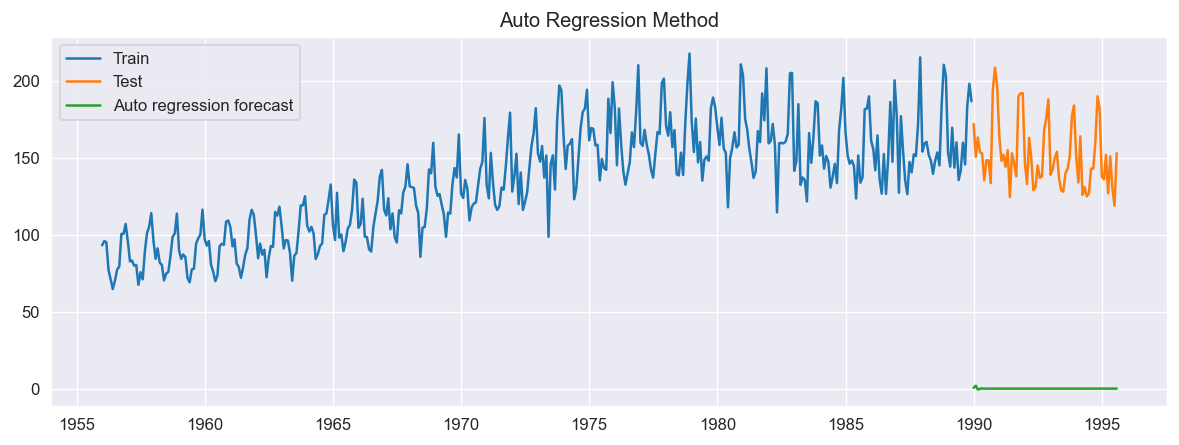

In [609]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [610]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_ar['ar_forecast'][test.index.min():])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                           Naive method   40.81  26.12
0                  Simple average method   27.55  12.14
0         Simple moving average forecast   22.57  13.38
0  Simple exponential smoothing forecast   41.59  26.62
0    Holt's exponential smoothing method   49.41  31.79
0          Holt Winters' additive method   26.80  16.29
0    Holt Winters' multiplicative method   24.87  14.73
0             Autoregressive (AR) method  153.07  99.91

**Inference : AR method works better than Holt Winters' multiplicative method but works poorer than Holt Winters' additive method.**

### Moving average method (MA)

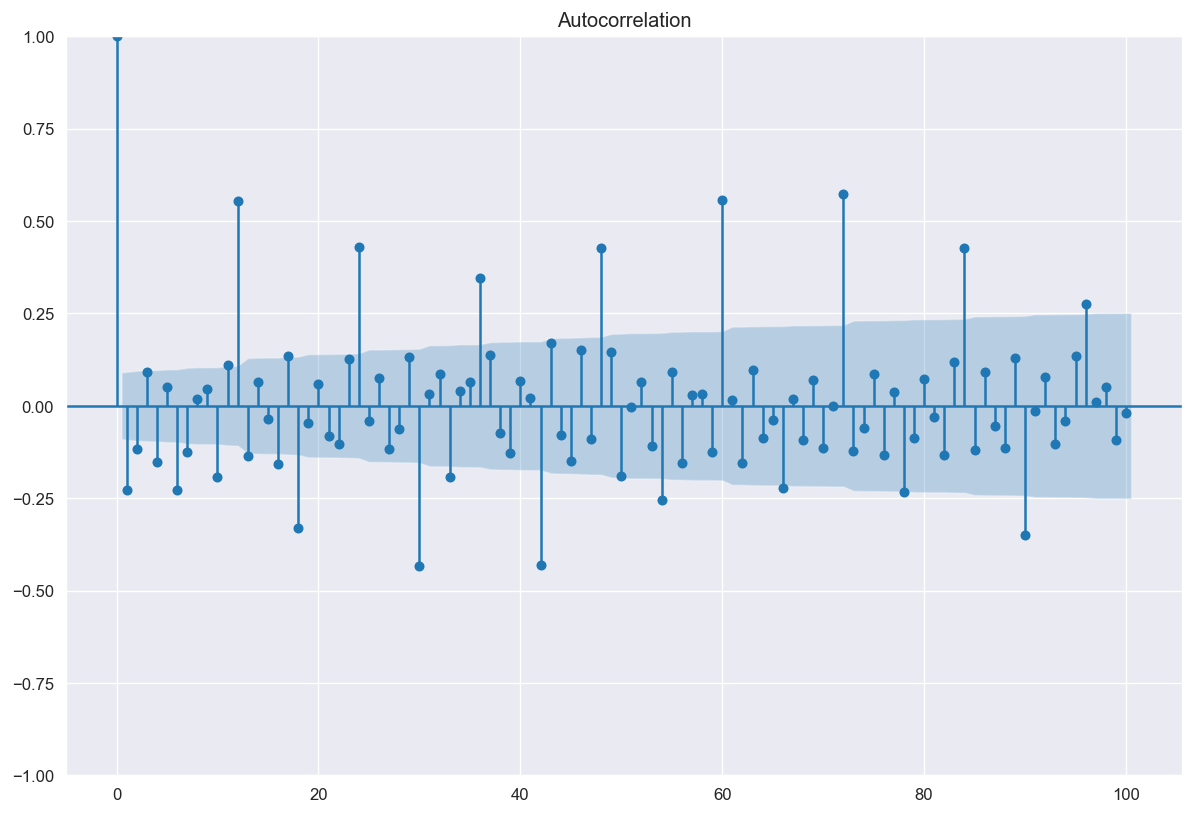

In [611]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1['Monthly Production'].diff().dropna(), lags=100);

In [612]:
import statsmodels as sm
model = sm.tsa.arima.model.ARIMA(sta['diff'], order=(0, 0, 2)) 
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  476
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2032.746
Date:                Wed, 30 Nov 2022   AIC                           4073.492
Time:                        22:27:57   BIC                           4090.154
Sample:                    01-01-1956   HQIC                          4080.044
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1373      0.071      1.924      0.054      -0.003       0.277
ma.L1         -0.4776      0.043    -11.069      0.000      -0.562      -0.393
ma.L2         -0.4386      0.043    -10.129      0.000      -0.523      -0.354
sigma2       304.1273     19.581     15.532      0.000     265.749     342.505
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):                 4.72
Prob(Q):                              0.40   Prob(JB):                         0.09
Heteroskedasticity (H):               2.82   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [613]:
# Recover original time series

y_hat_ma = test.copy()
y_hat_ma['ma_forecast'] = model_fit.predict(test.index.min(),test.index.max(),dynamic=True)


In [614]:
y_hat_ma['ma_forecast']

Month
1990-01-01   -16.002072
1990-02-01    -5.550251
1990-03-01     0.137259
1990-04-01     0.137259
1990-05-01     0.137259
                ...    
1995-04-01     0.137259
1995-05-01     0.137259
1995-06-01     0.137259
1995-07-01     0.137259
1995-08-01     0.137259
Name: ma_forecast, Length: 68, dtype: float64

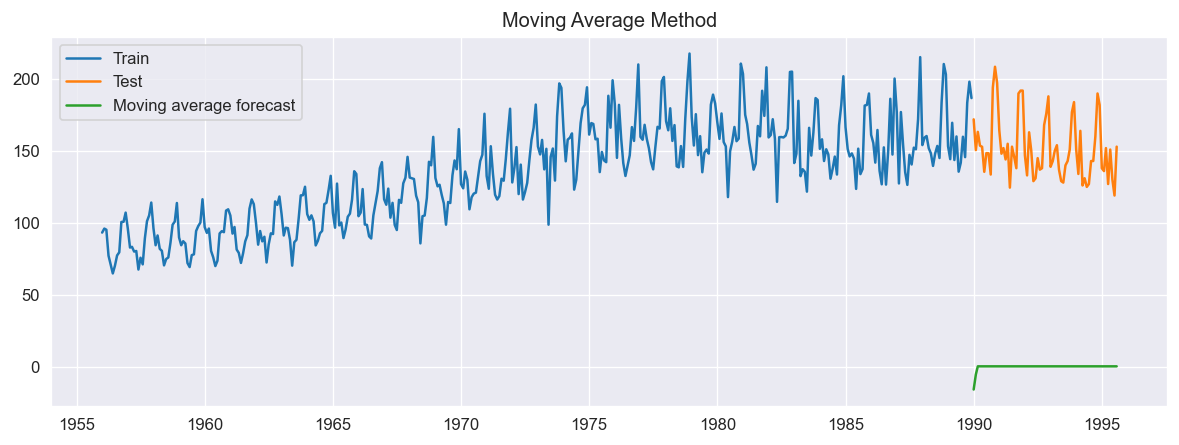

In [615]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [616]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_ma['ma_forecast'][test.index.min():])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE    MAPE
0                           Naive method   40.81   26.12
0                  Simple average method   27.55   12.14
0         Simple moving average forecast   22.57   13.38
0  Simple exponential smoothing forecast   41.59   26.62
0    Holt's exponential smoothing method   49.41   31.79
0          Holt Winters' additive method   26.80   16.29
0    Holt Winters' multiplicative method   24.87   14.73
0             Autoregressive (AR) method  153.07   99.91
0             Moving Average (MA) method  153.42  100.10

**Inference : MA method clearly performs poorer as compared to AR method.**

### Auto regression moving average method (ARMA)

In [617]:
import statsmodels as sm
model = sm.tsa.arima.model.ARIMA(sta['diff'], order=(2, 0, 2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  476
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2022.724
Date:                Wed, 30 Nov 2022   AIC                           4057.448
Time:                        22:27:57   BIC                           4082.441
Sample:                    01-01-1956   HQIC                          4067.275
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1397      0.073      1.921      0.055      -0.003       0.282
ar.L1         -0.3124      0.099     -3.158      0.002      -0.506      -0.118
ar.L2          0.3169      0.073      4.316      0.000       0.173       0.461
ma.L1         -0.1090      0.080     -1.364      0.172      -0.266       0.048
ma.L2         -0.8047      0.080    -10.085      0.000      -0.961      -0.648
sigma2       291.6460     18.545     15.727      0.000     255.299     327.993
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.76   Prob(JB):                         0.35
Heteroskedasticity (H):               3.08   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [618]:
# Recover original time series

y_hat_arma = test.copy()
#y_hat_arma['arma_forecast'] = model_fit.predict(test.index.min(),test.index.max(),dynamic=True)


In [619]:
y_hat_arma['arma_forecast'] = model_fit.predict(test.index.min(),test.index.max(),dynamic=True)


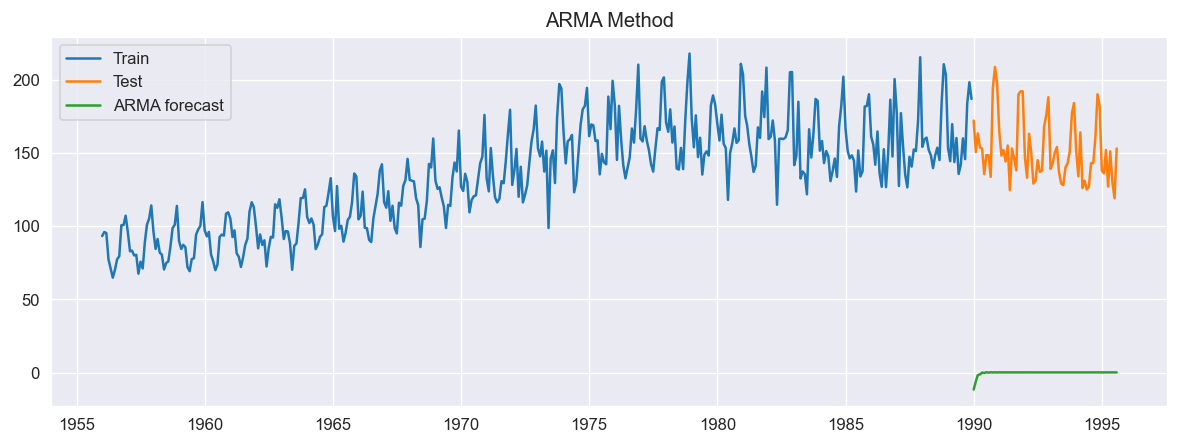

In [620]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [621]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_arma['arma_forecast'][test.index.min():])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE    MAPE
0                                 Naive method   40.81   26.12
0                        Simple average method   27.55   12.14
0               Simple moving average forecast   22.57   13.38
0        Simple exponential smoothing forecast   41.59   26.62
0          Holt's exponential smoothing method   49.41   31.79
0                Holt Winters' additive method   26.80   16.29
0          Holt Winters' multiplicative method   24.87   14.73
0                   Autoregressive (AR) method  153.07   99.91
0                   Moving Average (MA) method  153.42  100.10
0  Autoregressive moving average (ARMA) method  153.40  100.10

**Inference : ARMA method performs better than MA method but poorer as compared to AR method.**

This workbook is based on the original [Arima Model - Complete Guide to Time Series Forecasting in Python](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/) post in Machine Learning Plus.

## __How to find the order of differencing (d) in ARIMA model?__

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

In [622]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data1['Monthly Production'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.282661
p-value: 0.177621


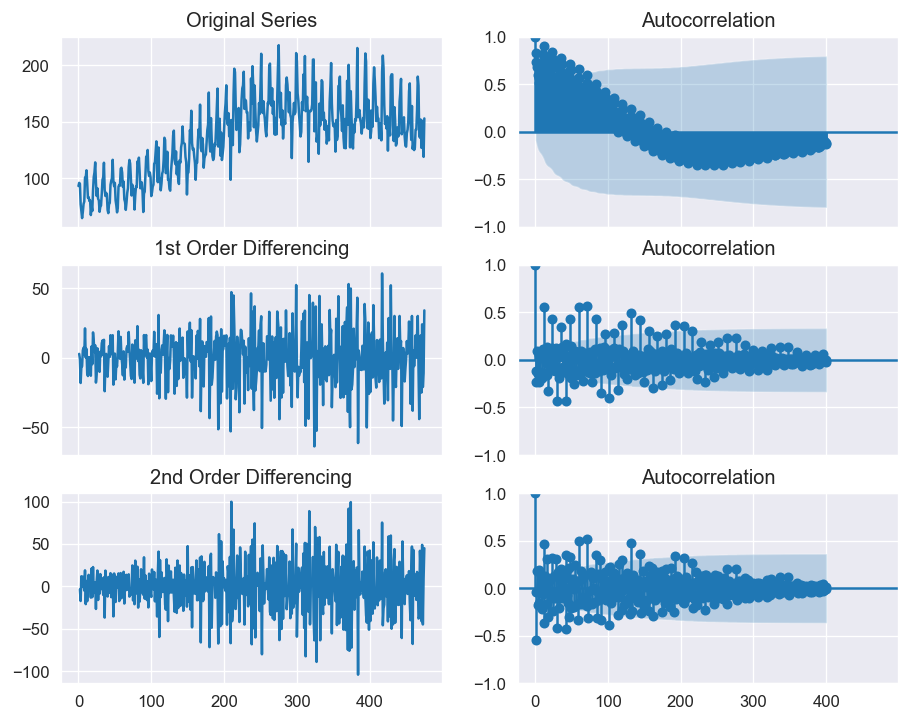

In [623]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('/Users/admin/Desktop/EDA/Time_series/monthly-production.csv')
#df.rename(columns={'Monthly Production':'Monthly_Production'}, inplace=True)
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Monthly Production']); axes[0, 0].set_title('Original Series')
plot_acf(df['Monthly Production'], ax=axes[0, 1], lags=400)

# 1st Differencing
axes[1, 0].plot(df['Monthly Production'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Monthly Production'].diff().dropna(), ax=axes[1, 1],lags=400)

# 2nd Differencing
axes[2, 0].plot(df['Monthly Production'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Monthly Production'].diff().diff().dropna(), ax=axes[2, 1],lags=400)

plt.show()

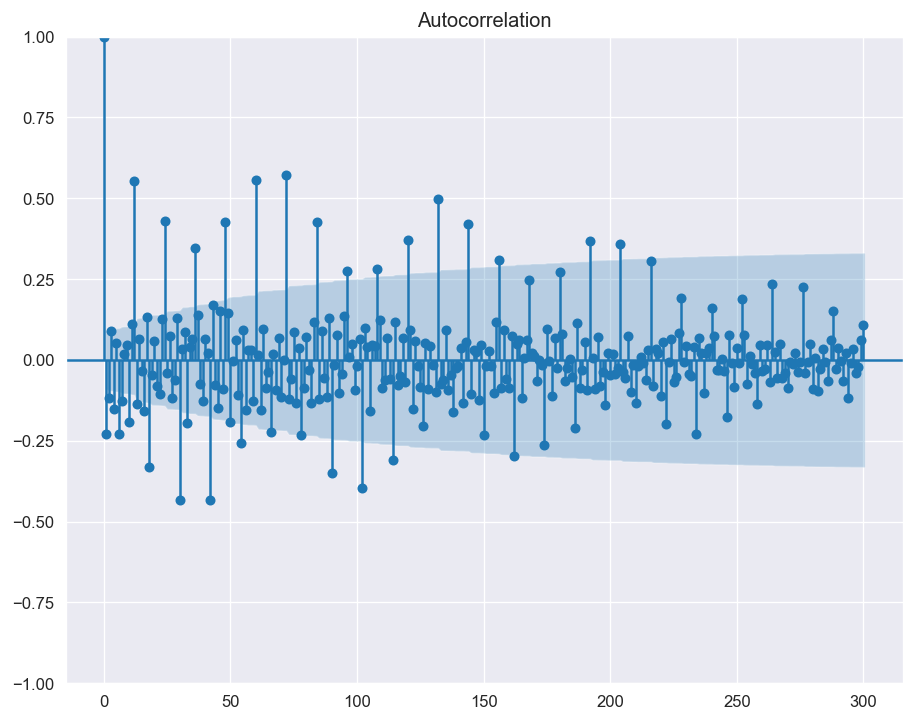

In [624]:
plot_acf(df['Monthly Production'].diff().dropna(), lags=300);

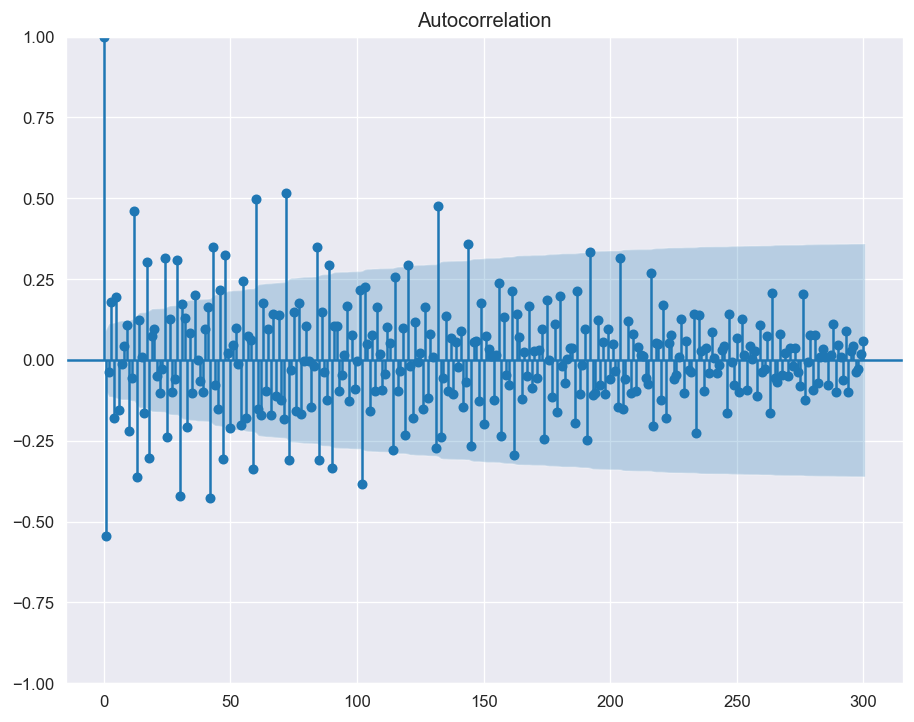

In [625]:
plot_acf(df['Monthly Production'].diff().diff().dropna(), lags=300);

2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced
hence chose d = 1

## __Find the order of the AR Term (p)__

You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

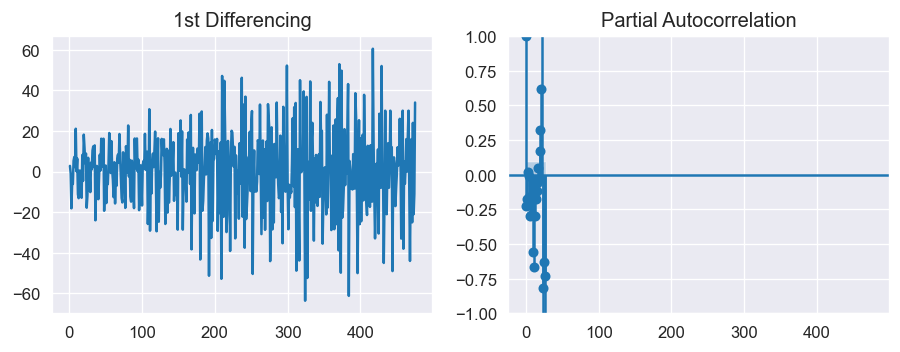

In [626]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Monthly Production'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['Monthly Production'].diff().dropna(), ax=axes[1])

plt.show()

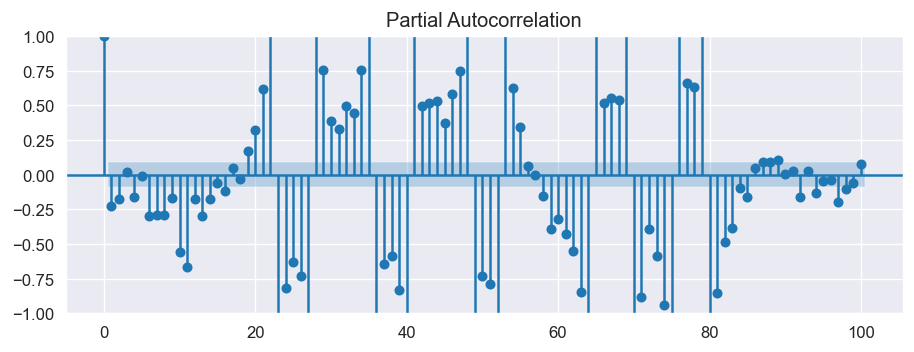

In [627]:
plot_pacf(df['Monthly Production'].diff().dropna(), lags=100);

## p is 2

## __Find the order of the MA Term (q)__


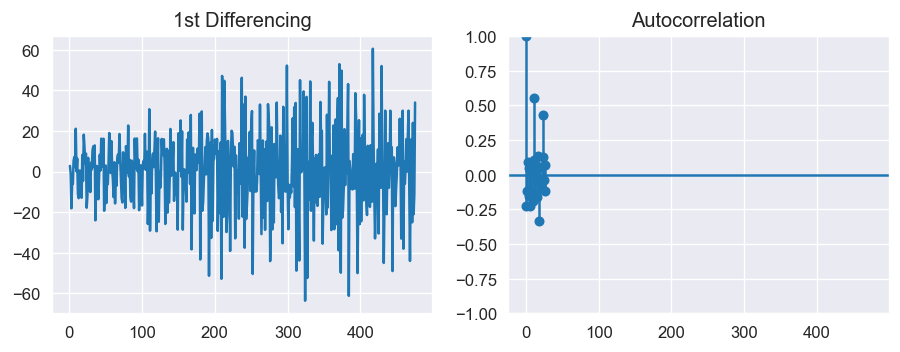

In [628]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Monthly Production'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['Monthly Production'].diff().dropna(), ax=axes[1])

plt.show()

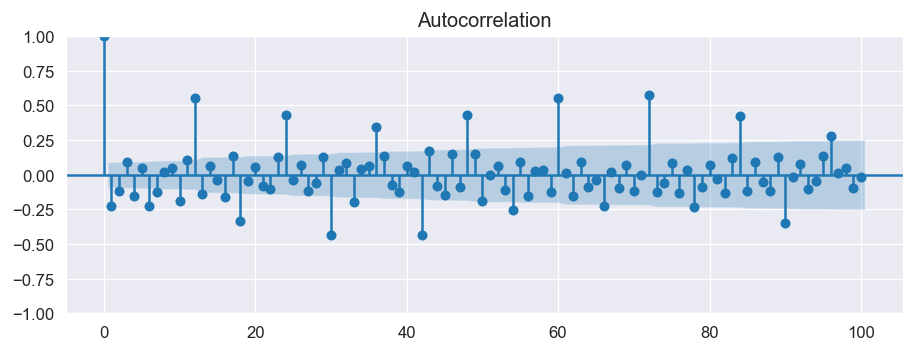

In [629]:
plot_acf(df['Monthly Production'].diff().dropna(), lags=100);

### q is 2

### Auto regressive integrated moving average (ARIMA)

In [630]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1['Monthly Production'], order=(2, 1, 2))

model_fit = model.fit()
model_fit.summary()
#print(model_fit.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Monthly Production   No. Observations:                  476
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2024.362
Date:                Wed, 30 Nov 2022   AIC                           4058.724
Time:                        22:28:02   BIC                           4079.541
Sample:                    01-01-1956   HQIC                          4066.910
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3125      0.099     -3.157      0.002      -0.507      -0.118
ar.L2          0.3176      0.075      4.212      0.000       0.170       0.465
ma.L1         -0.1015      0.081     -1.259      0.208      -0.259       0.056
ma.L2         -0.7989      0.081     -9.885      0.000      -0.957      -0.641
sigma2       293.7420     18.187     16.151      0.000     258.097     329.387
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 2.37
Prob(Q):                              0.66   Prob(JB):                         0.31
Heteroskedasticity (H):               2.91   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [631]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data1[:'1989-12-01']
test = data1['1990-01-01':]

In [632]:
# Recover original time series forecast

y_hat_arima = test.copy()
#y_hat_arima['arima_forecast'] = model_fit.predict(start=409,end=476,dynamic=False)
y_hat_arima['arima_forecast'] = model_fit.predict(test.index.min(),test.index.max(),dynamic=True)

#y_hat_arima = y_hat_arima.dropna()

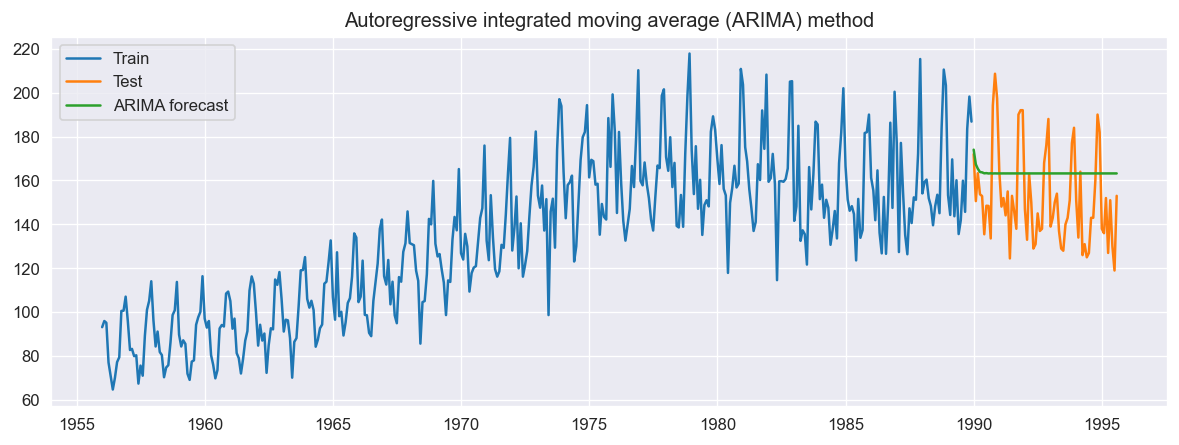

In [633]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [634]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_arima['arima_forecast'][test.index.min():])/test['Monthly Production'])*100,2)
tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE    MAPE
0                                       Naive method   40.81   26.12
0                              Simple average method   27.55   12.14
0                     Simple moving average forecast   22.57   13.38
0              Simple exponential smoothing forecast   41.59   26.62
0                Holt's exponential smoothing method   49.41   31.79
0                      Holt Winters' additive method   26.80   16.29
0                Holt Winters' multiplicative method   24.87   14.73
0                         Autoregressive (AR) method  153.07   99.91
0                         Moving Average (MA) method  153.42  100.10
0        Autoregressive moving average (ARMA) method  153.40  100.10
0  Autoregressive integrated moving average (ARIM...   23.88   14.53

### Seasonal auto regressive integrated moving average (SARIMA)

In [635]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

smodel = SARIMAX(data1['Monthly Production'], order=(2, 1, 3), seasonal_order=(0, 1, 1, 12)) 
smodel_fit = smodel.fit()
#print(model_fit.params)
smodel_fit.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99679D+00    |proj g|=  3.60343D-01

At iterate    5    f=  3.69728D+00    |proj g|=  2.01920D-01

At iterate   10    f=  3.65144D+00    |proj g|=  8.47890D-02

At iterate   15    f=  3.60280D+00    |proj g|=  2.82580D-02

At iterate   20    f=  3.57402D+00    |proj g|=  9.56721D-02

At iterate   25    f=  3.56774D+00    |proj g|=  9.62894D-02

At iterate   30    f=  3.56398D+00    |proj g|=  7.78696D-03

At iterate   35    f=  3.55950D+00    |proj g|=  1.21685D-01

At iterate   40    f=  3.54850D+00    |proj g|=  8.46806D-02

At iterate   45    f=  3.54430D+00    |proj g|=  2.02640D-01

At iterate   50    f=  3.54188D+00    |proj g|=  7.63851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                   Monthly Production   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -1685.936
Date:                              Wed, 30 Nov 2022   AIC                           3385.872
Time:                                      22:28:07   BIC                           3414.836
Sample:                                  01-01-1956   HQIC                          3397.275
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1531      0.004   -269.432      0.000      -1.161      -1.145
ar.L2         -0.9964      0.005   -217.000      0.000      -1.005      -0.987
ma.L1          0.2394      0.026      9.159      0.000       0.188       0.291
ma.L2         -0.0164      0.026     -0.626      0.531      -0.068       0.035
ma.L3         -0.8573      0.024    -35.549      0.000      -0.905      -0.810
ma.S.L12      -0.8187      0.030    -27.736      0.000      -0.877      -0.761
sigma2        82.3300      4.472     18.411      0.000      73.565      91.095
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                38.66
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               3.68   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [636]:
# Recover original time series forecast

y_hat_sarima = test.copy()
y_hat_sarima['sarima_forecast'] = smodel_fit.predict(test.index.min(),test.index.max(),dynamic=False)


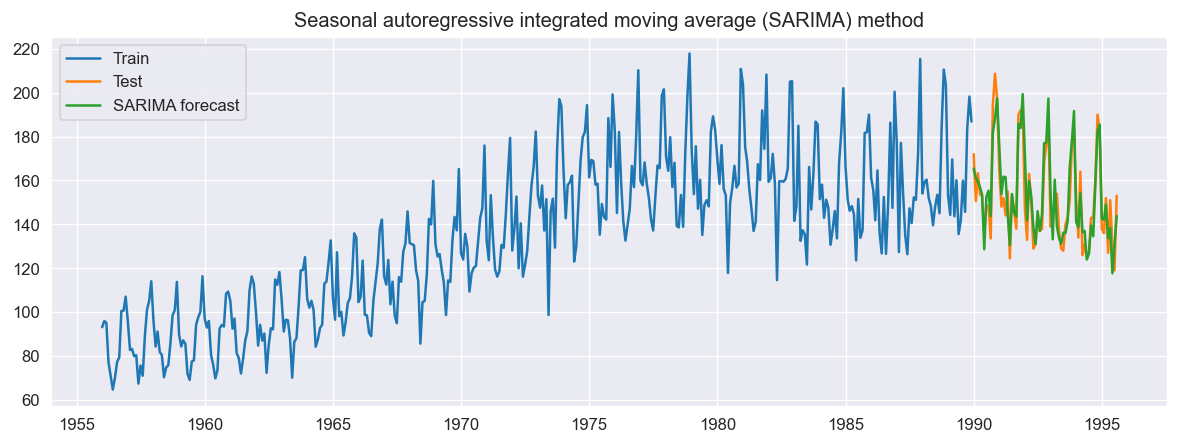

In [637]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Monthly Production'], label='Train')
plt.plot(test['Monthly Production'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [638]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Monthly Production'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Monthly Production']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Monthly Production'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE    MAPE
0                                       Naive method   40.81   26.12
0                              Simple average method   27.55   12.14
0                     Simple moving average forecast   22.57   13.38
0              Simple exponential smoothing forecast   41.59   26.62
0                Holt's exponential smoothing method   49.41   31.79
0                      Holt Winters' additive method   26.80   16.29
0                Holt Winters' multiplicative method   24.87   14.73
0                         Autoregressive (AR) method  153.07   99.91
0                         Moving Average (MA) method  153.42  100.10
0        Autoregressive moving average (ARMA) method  153.40  100.10
0  Autoregressive integrated moving average (ARIM...   23.88   14.53
0  Seasonal autoregressive integrated moving aver...    8.58    4.65

### Auto auto regressive integrated moving average (ARIMA)

In [639]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
#from pyramid.arima import auto_arima
auto_model = pm.auto_arima(data1, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=1,
                         start_P=0, seasonal=False,
                         stationary=False,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

#auto_model = pm.arima.auto_arima(data1, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=12, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None)#auto_model = pm.auto_arima(data1,start_p=1, d=1, start_q=1,max_p=3, max_d=1, max_q=3,start_P=1, D=1, start_Q=1,max_P=2, max_D=1, max_Q=2,max_order=5, m=12,seasonal=False, stationary=False,information_criterion='aic',alpha=0.05,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True,n_jobs=-1,maxiter=10)                        
auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4063.124, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4180.337, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4156.947, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4146.686, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4178.356, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4136.082, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4064.390, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4073.491, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4143.763, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4057.447, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4058.387, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4059.005, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4066.339, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4064.779, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  476
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2022.724
Date:                Wed, 30 Nov 2022   AIC                           4057.447
Time:                        22:28:14   BIC                           4082.427
Sample:                    01-01-1956   HQIC                          4067.270
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1390      0.075      1.843      0.065      -0.009       0.287
ar.L1         -0.3124      0.099     -3.157      0.002      -0.506      -0.118
ar.L2          0.3169      0.073      4.316      0.000       0.173       0.461
ma.L1         -0.1091      0.080     -1.364      0.172      -0.266       0.048
ma.L2         -0.8046      0.080    -10.084      0.000      -0.961      -0.648
sigma2       291.6423     18.544     15.727      0.000     255.296     327.988
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.76   Prob(JB):                         0.36
Heteroskedasticity (H):               3.05   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

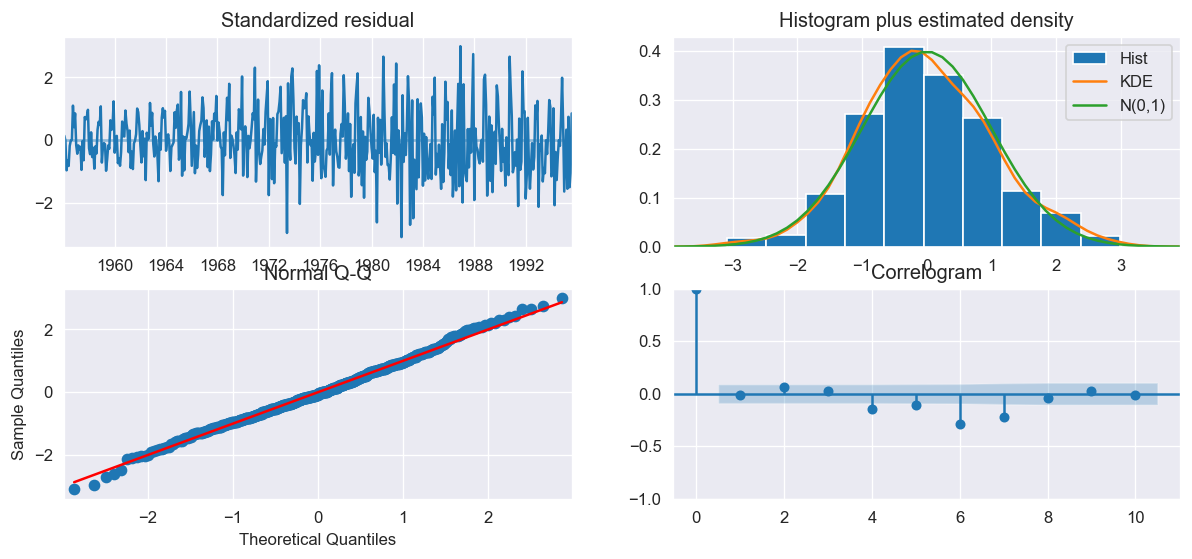

In [640]:
auto_model.plot_diagnostics(figsize=(12,5))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

In [641]:
# Train Test Split
train = data1.loc[:'1989-12-01']
test = data1.loc['1990-01-01':]

# Train
auto_model.fit(train)


ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

Evaluate prediction result on test data:

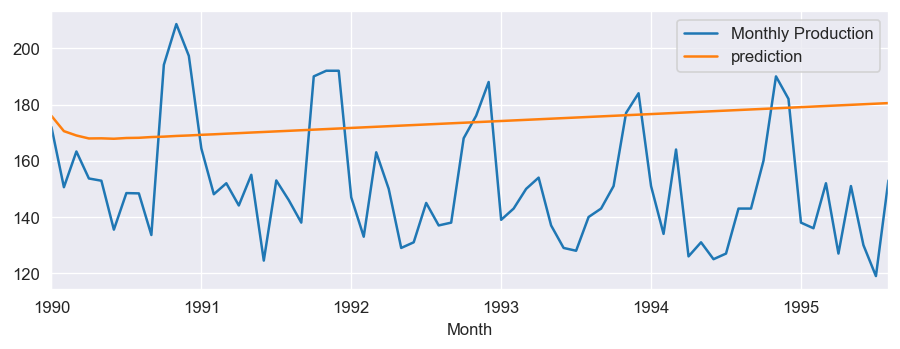

In [642]:
future_forecast = auto_model.predict(n_periods=68)
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['prediction'])
test_data_evaluation = pd.concat([test, future_forecast], axis=1)

ax = test_data_evaluation.plot()
fig = ax.get_figure()
#fig.savefig("output/arima_evaluation_test_data_line_plot.png")

## Overlaying test data predictions on full data set:


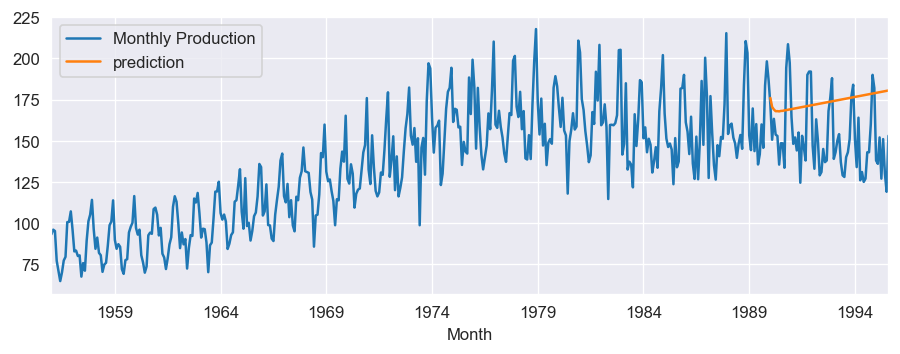

In [643]:
full_data_evaluation = pd.concat([data1, future_forecast], axis=1)
ax = full_data_evaluation.plot()
fig = ax.get_figure()
#fig.savefig("output/arima_evaluation_full_data_line_plot.png")

## Forecasting using ARIMA

In [644]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


auto_model = pm.auto_arima(data1, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=1,
                         start_P=0, seasonal=False,
                         stationary=False,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4063.124, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4180.337, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4156.947, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4146.686, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4178.356, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4136.082, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4064.390, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4073.491, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4143.763, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4057.447, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4058.387, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4059.005, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4066.339, Time=0.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4064.779, Time=0.56 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

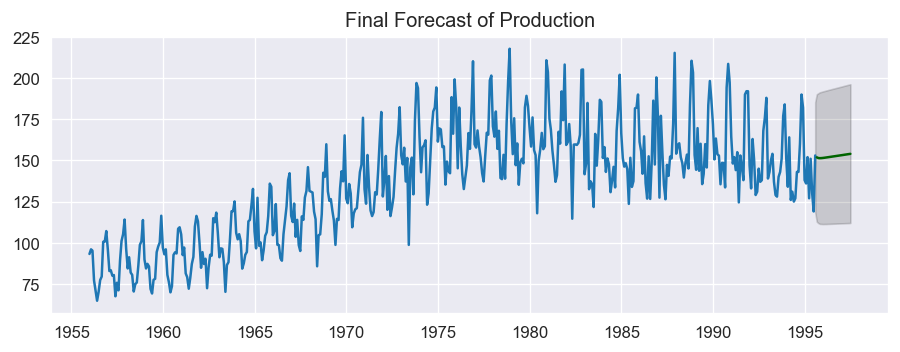

In [645]:
# Forecast
n_periods = 24
fc, confint = auto_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data1.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data1['Monthly Production'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Production")
plt.show()

### Seasonal Auto regressive integrated moving average (SARIMA)

In [646]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data1, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         stationary=False,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3473.445, Time=0.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4010.558, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3816.510, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3483.597, Time=0.48 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=3639.093, Time=0.26 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3468.290, Time=1.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3579.709, Time=0.48 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3467.032, Time=2.45 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3552.157, Time=1.02 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3461.258, Time=5.14 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3469.175, Time=2.79 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3468.958, Time=3.38 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3661.309, Time=4.15 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3446.515, Time=6.52 sec
 ARIMA(2,1,1)(1,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -1685.936
Date:                              Wed, 30 Nov 2022   AIC                           3385.872
Time:                                      22:30:54   BIC                           3414.836
Sample:                                  01-01-1956   HQIC                          3397.275
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1531      0.004   -269.432      0.000      -1.161      -1.145
ar.L2         -0.9964      0.005   -217.000      0.000      -1.005      -0.987
ma.L1          0.2394      0.026      9.159      0.000       0.188       0.291
ma.L2         -0.0164      0.026     -0.626      0.531      -0.068       0.035
ma.L3         -0.8573      0.024    -35.549      0.000      -0.905      -0.810
ma.S.L12      -0.8187      0.030    -27.736      0.000      -0.877      -0.761
sigma2        82.3300      4.472     18.411      0.000      73.565      91.095
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                38.66
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               3.68   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

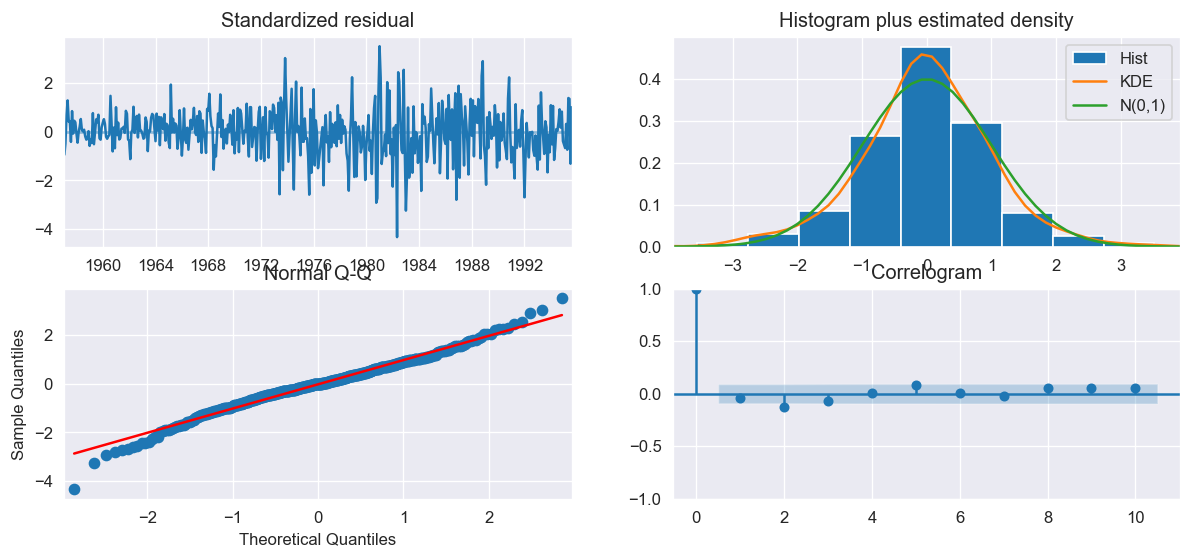

In [647]:
smodel.plot_diagnostics(figsize=(12,5))
plt.show()

In [648]:
# Train Test Split
train = data1.loc[:'1989-12-01']
test = data1.loc['1990-01-01':]

# Train
smodel.fit(train)

ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

Evaluate prediction result on test data:

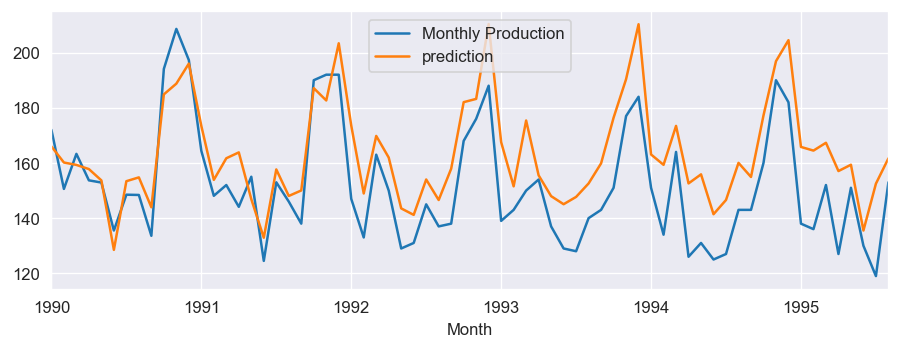

In [649]:
future_forecast = smodel.predict(n_periods=68)
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['prediction'])
test_data_evaluation = pd.concat([test, future_forecast], axis=1)

ax = test_data_evaluation.plot()
fig = ax.get_figure()
#fig.savefig("output/arima_evaluation_test_data_line_plot.png")



## Overlaying test data predictions on full data set:


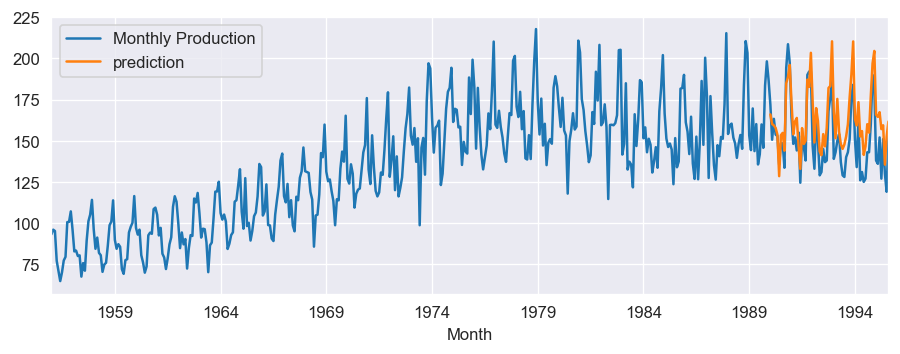

In [650]:
full_data_evaluation = pd.concat([data1, future_forecast], axis=1)
ax = full_data_evaluation.plot()
fig = ax.get_figure()


## Forecasting using SARIMA

In [651]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
auto_smodel = pm.auto_arima(data1, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         stationary=False,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

auto_smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3473.445, Time=0.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4010.558, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3816.510, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3483.597, Time=0.48 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=3639.093, Time=0.25 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3468.290, Time=1.29 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3579.709, Time=0.50 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3467.032, Time=2.79 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3552.157, Time=1.06 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3461.258, Time=5.47 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3469.175, Time=3.31 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3468.958, Time=3.65 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3661.309, Time=4.27 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3446.515, Time=5.88 sec
 ARIMA(2,1,1)(1,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -1685.936
Date:                              Wed, 30 Nov 2022   AIC                           3385.872
Time:                                      22:33:26   BIC                           3414.836
Sample:                                  01-01-1956   HQIC                          3397.275
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1531      0.004   -269.432      0.000      -1.161      -1.145
ar.L2         -0.9964      0.005   -217.000      0.000      -1.005      -0.987
ma.L1          0.2394      0.026      9.159      0.000       0.188       0.291
ma.L2         -0.0164      0.026     -0.626      0.531      -0.068       0.035
ma.L3         -0.8573      0.024    -35.549      0.000      -0.905      -0.810
ma.S.L12      -0.8187      0.030    -27.736      0.000      -0.877      -0.761
sigma2        82.3300      4.472     18.411      0.000      73.565      91.095
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                38.66
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               3.68   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

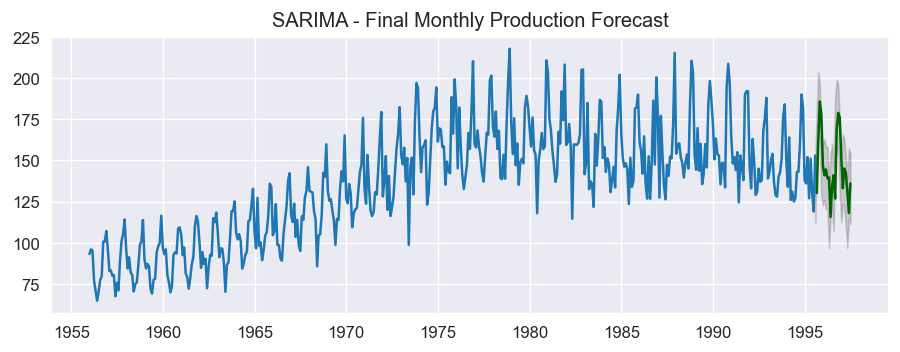

In [652]:
# Forecast
n_periods = 24
fitted, confint = auto_smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data1.index[-1], periods = n_periods, freq='MS')
#index_of_fc = np.arange(len(data1['Monthly Production']), len(data1['Monthly Production'])+n_periods)


# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data1)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)


plt.title("SARIMA - Final Monthly Production Forecast")
plt.show()

**Inference : SARIMA method performs the best among ARIMA set of models.**

In [653]:
results

Method    RMSE    MAPE
0                                       Naive method   40.81   26.12
0                              Simple average method   27.55   12.14
0                     Simple moving average forecast   22.57   13.38
0              Simple exponential smoothing forecast   41.59   26.62
0                Holt's exponential smoothing method   49.41   31.79
0                      Holt Winters' additive method   26.80   16.29
0                Holt Winters' multiplicative method   24.87   14.73
0                         Autoregressive (AR) method  153.07   99.91
0                         Moving Average (MA) method  153.42  100.10
0        Autoregressive moving average (ARMA) method  153.40  100.10
0  Autoregressive integrated moving average (ARIM...   23.88   14.53
0  Seasonal autoregressive integrated moving aver...    8.58    4.65